<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/supervised/laptop_data_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('laptop_uncleaned.csv')

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2843 non-null   object 
 1   Brand             2810 non-null   object 
 2   Screen_Size       2756 non-null   object 
 3   CPU_Model         2628 non-null   object 
 4   Ram               2711 non-null   object 
 5   Operating_System  2723 non-null   object 
 6   Rating            2283 non-null   float64
 7   Series            2501 non-null   object 
 8   Color             2109 non-null   object 
 9   Resolution        182 non-null    object 
 10  Weight            66 non-null     object 
 11  USB               35 non-null     float64
 12  Battery           7 non-null      object 
 13  Graphics          2063 non-null   object 
 14  Disk_size         2248 non-null   object 
 15  Card_desc         2635 non-null   object 
 16  Price             1863 non-null   object 


In [ ]:
df.drop(['Resolution', 'Weight', 'USB', 'Battery'], axis=1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Price,980
Graphics,780
Color,734
Disk_size,595
Rating,560
Series,342
CPU_Model,215
Card_desc,208
Ram,132
Operating_System,120


In [ ]:
df.dropna(subset=['Price'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Graphics,512
Disk_size,391
Color,375
Rating,313
Series,217
Card_desc,136
CPU_Model,98
Ram,89
Operating_System,76
Screen_Size,41


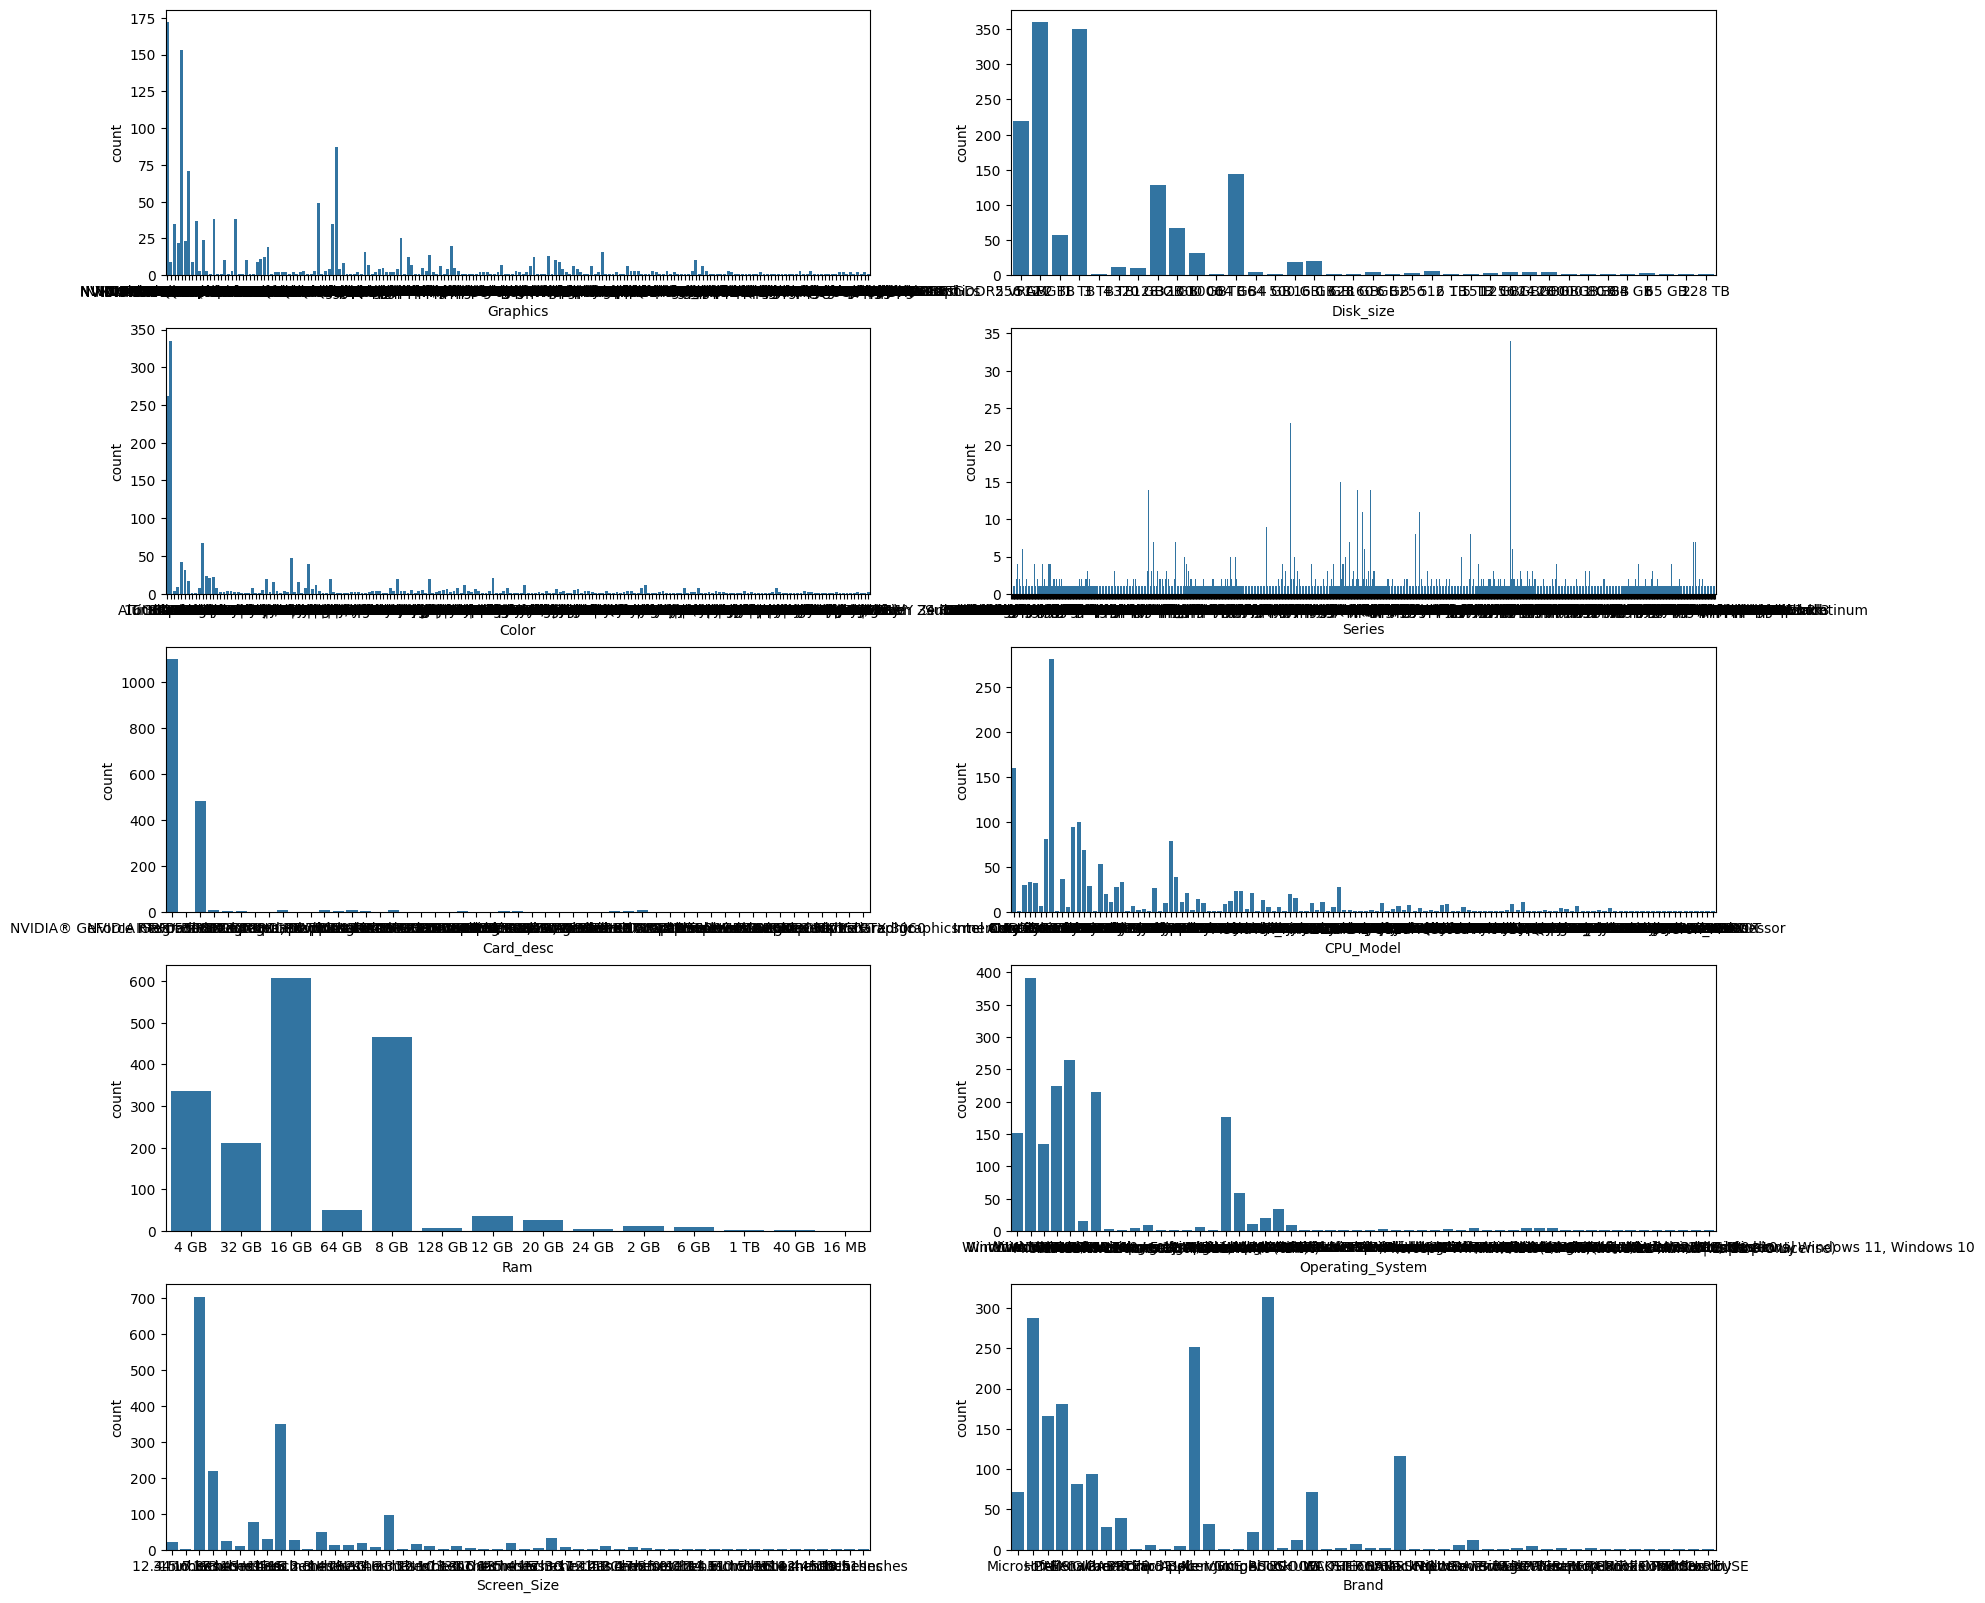

In [ ]:
column_name = ['Graphics', 'Disk_size', 'Color', 'Series', 'Card_desc', 'CPU_Model', 'Ram', 'Operating_System', 'Screen_Size','Brand']
plt.figure(figsize=(20,20))
for n,col in enumerate(column_name):
  plt.subplot(5,2,n+1)
  sns.countplot(x=col, data=df)

plt.show()

In [ ]:
df.nunique()

,0
Title,1535
Brand,48
Screen_Size,52
CPU_Model,130
Ram,14
Operating_System,54
Rating,33
Series,941
Color,199
Graphics,196


<Axes: xlabel='Rating', ylabel='count'>

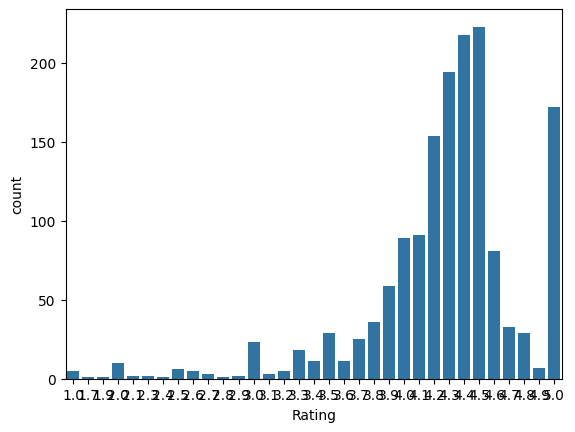

In [ ]:
sns.countplot(x='Rating', data=df)

In [ ]:
df.dropna(subset=['Graphics', 'Color'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Disk_size,172
Rating,170
Series,96
Card_desc,38
CPU_Model,10
Ram,9
Screen_Size,2
Title,0
Brand,0
Operating_System,0


In [ ]:
df.dropna(subset=['Disk_size'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Rating,102
Series,95
Card_desc,32
CPU_Model,9
Ram,7
Screen_Size,2
Title,0
Brand,0
Operating_System,0
Color,0


In [ ]:
from sklearn.impute import SimpleImputer

for col in ['Series','Card_desc', 'CPU_Model', 'Ram', 'Screen_Size']:
  imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
  df[col] = imputer.fit_transform(df[[col]]).reshape(-1,1).ravel()

In [ ]:
imputer_2 = SimpleImputer(missing_values= np.nan, strategy='median')
df['Rating'] = imputer_2.fit_transform(df[['Rating']]).reshape(-1,1).ravel()

In [ ]:
df.isnull().sum()

,0
Title,0
Brand,0
Screen_Size,0
CPU_Model,0
Ram,0
Operating_System,0
Rating,0
Series,0
Color,0
Graphics,0


In [ ]:
df.duplicated().sum()

168

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(764, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 7 to 2838
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             764 non-null    object 
 1   Brand             764 non-null    object 
 2   Screen_Size       764 non-null    object 
 3   CPU_Model         764 non-null    object 
 4   Ram               764 non-null    object 
 5   Operating_System  764 non-null    object 
 6   Rating            764 non-null    float64
 7   Series            764 non-null    object 
 8   Color             764 non-null    object 
 9   Graphics          764 non-null    object 
 10  Disk_size         764 non-null    object 
 11  Card_desc         764 non-null    object 
 12  Price             764 non-null    object 
dtypes: float64(1), object(12)
memory usage: 83.6+ KB


In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Graphics,Disk_size,Card_desc,Price
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16 GB,Windows 10 Pro,4.3,Latitude 3510,Black,Intel UHD Graphics,256 GB,Integrated,$818.00
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,Core i7 8750H,16 GB,Windows 10 Home,5.0,17 R5,Black,NVIDIA GeForce GTX 1070,1 TB,Dedicated,"$1,799.95"
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3 Inches,Intel Core i7,16 GB,Windows 11,4.1,Pulse GL76 12UGK,16GB RAM,NVIDIA GeForce RTX 3070,512 GB,Dedicated,"$1,699.00"
15,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3 Inches,Intel Core i9,64 GB,Windows 11 Pro,5.0,Raider GE76 12UH,64GB RAM,NVIDIA GeForce RTX 3080,3 TB,Dedicated,"$4,345.00"
17,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6 Inches,Intel Core i9,16 GB,Windows 11,5.0,G533ZM-ES93,16GB RAM,NVIDIA GeForce RTX 3060,512 GB,Dedicated,"$1,799.00"


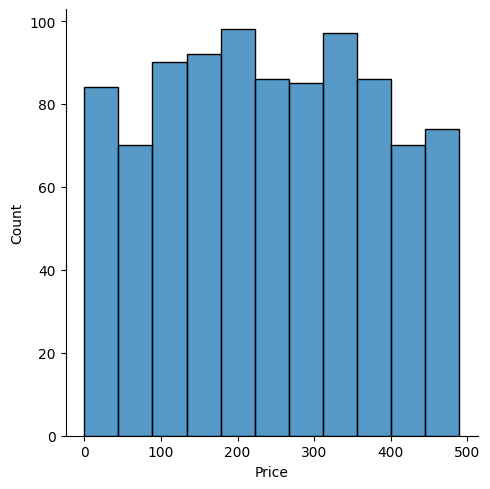

In [ ]:
sns.displot(df['Price'])
plt.show()

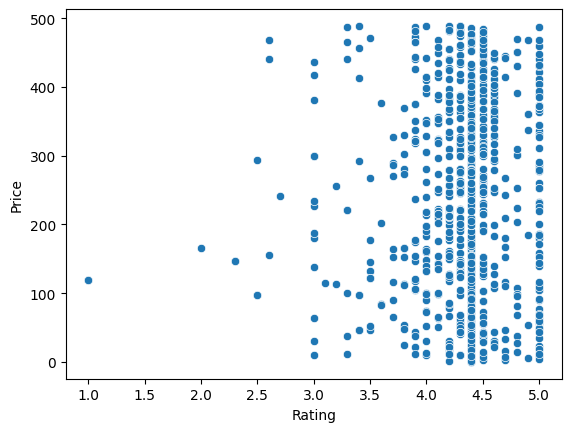

In [ ]:
sns.scatterplot(y='Price', x='Rating', data=df)
plt.show()

<Axes: >

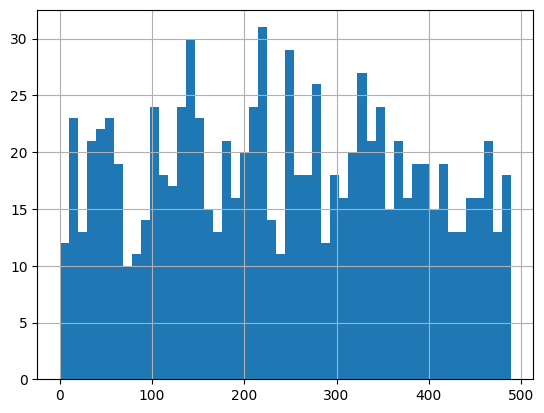

In [ ]:
df['Price'].hist(bins=50)

In [ ]:
def remove_dollarSign(x):
  y = x.replace('$', '')
  y = y.replace(',', '')
  return float(y)

In [ ]:
remove_dollarSign('$1000')

1000.0

In [ ]:
remove_dollarSign('$1,699.00')

1699.0

In [ ]:
df['Price']=df['Price'].apply(remove_dollarSign)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col])


In [ ]:
x =df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
models = {
    'LinearRegression':  LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=20),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'SVR': SVR()
}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
model_name = []
result = []

for name, model in tqdm(models.items()):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse= mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  model_name.append(name)
  result.append([mse, mae, rmse, r2])




100%|██████████| 5/5 [00:00<00:00, 18.23it/s]


In [ ]:
Model_Accuracy = pd.DataFrame(result, index=model_name, columns=['Mean Squared Error', 'Mean Absolute Error', 'Root MSE', 'R2 Score'])
Model_Accuracy

,Mean Squared Error,Mean Absolute Error,Root MSE,R2 Score
LinearRegression,442347.638665,441.609196,665.092203,0.285856
DecisionTreeRegressor,546022.422203,430.086234,738.933300,0.118479
RandomForestRegressor,347173.171978,325.324740,589.214029,0.439510
KNeighborsRegressor,722580.826682,527.331766,850.047544,-0.166564
SVR,715181.530861,562.289201,845.684061,-0.154618


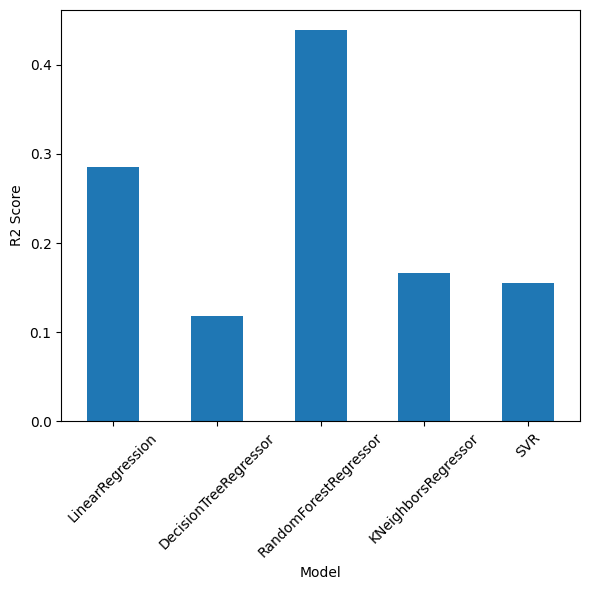

In [ ]:
abs(Model_Accuracy['R2 Score']).plot(kind='bar', figsize=(6,6))

plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

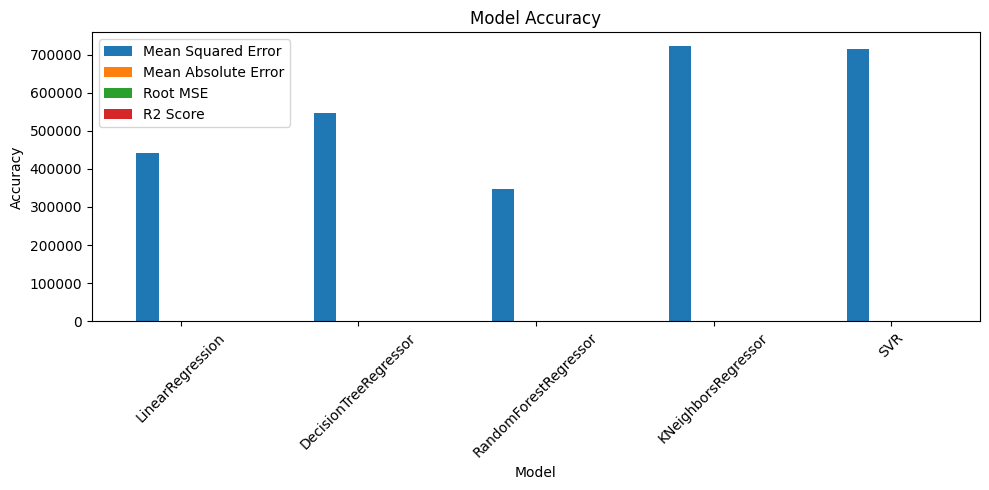

In [ ]:
Model_Accuracy.plot(kind='bar', figsize=(10,5))

plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()